## Objective: To predict if a customer is satisfied with the service provided by Airlines

In [2]:
# Importing required libraries.
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline
sns.set(color_codes=True)
df= pd.read_csv(r"C:/Users/bindh/OneDrive/Desktop/airline.csv") #reading data set
df

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight_distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,satisfied,Female,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,...,2,2,3,3,4,4,4,2,0,0.0
129876,dissatisfied,Male,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,...,1,3,2,3,3,1,2,1,174,172.0
129877,dissatisfied,Male,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,...,2,4,4,3,4,2,3,2,155,163.0
129878,dissatisfied,Male,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,...,2,3,3,2,3,2,1,2,193,205.0


In [2]:
list(df.columns) #list of columns in dataset

['satisfaction',
 'Gender',
 'Customer Type',
 'Age',
 'Type of Travel',
 'Class',
 'Flight_distance',
 'Seat comfort',
 'Departure/Arrival time convenient',
 'Food and drink',
 'Gate location',
 'Inflight wifi service',
 'Inflight entertainment',
 'Online support',
 'Ease of Online booking',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Cleanliness',
 'Online boarding',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes']

In [3]:
df.shape

(129880, 23)

In [4]:
df.dtypes #data types of columns

satisfaction                          object
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight_distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival De

In [5]:
# Replace spaces in the column names with underscore
df.columns = [c.replace(' ', '_') for c in df.columns]

In [6]:
list(df.columns)

['satisfaction',
 'Gender',
 'Customer_Type',
 'Age',
 'Type_of_Travel',
 'Class',
 'Flight_distance',
 'Seat_comfort',
 'Departure/Arrival_time_convenient',
 'Food_and_drink',
 'Gate_location',
 'Inflight_wifi_service',
 'Inflight_entertainment',
 'Online_support',
 'Ease_of_Online_booking',
 'On-board_service',
 'Leg_room_service',
 'Baggage_handling',
 'Checkin_service',
 'Cleanliness',
 'Online_boarding',
 'Departure_Delay_in_Minutes',
 'Arrival_Delay_in_Minutes']

In [7]:
df['satisfaction'].replace({'dissatisfied': 0, 'satisfied': 1},inplace = True)

In [8]:
print(df.isnull().sum()) #checking for null values

satisfaction                           0
Gender                                 0
Customer_Type                          0
Age                                    0
Type_of_Travel                         0
Class                                  0
Flight_distance                        0
Seat_comfort                           0
Departure/Arrival_time_convenient      0
Food_and_drink                         0
Gate_location                          0
Inflight_wifi_service                  0
Inflight_entertainment                 0
Online_support                         0
Ease_of_Online_booking                 0
On-board_service                       0
Leg_room_service                       0
Baggage_handling                       0
Checkin_service                        0
Cleanliness                            0
Online_boarding                        0
Departure_Delay_in_Minutes             0
Arrival_Delay_in_Minutes             393
dtype: int64


Since the number of null values are less and found only in one column, dropping them.

In [9]:
df = df.dropna()
df.count()

satisfaction                         129487
Gender                               129487
Customer_Type                        129487
Age                                  129487
Type_of_Travel                       129487
Class                                129487
Flight_distance                      129487
Seat_comfort                         129487
Departure/Arrival_time_convenient    129487
Food_and_drink                       129487
Gate_location                        129487
Inflight_wifi_service                129487
Inflight_entertainment               129487
Online_support                       129487
Ease_of_Online_booking               129487
On-board_service                     129487
Leg_room_service                     129487
Baggage_handling                     129487
Checkin_service                      129487
Cleanliness                          129487
Online_boarding                      129487
Departure_Delay_in_Minutes           129487
Arrival_Delay_in_Minutes        

In [10]:
Q1 = df.quantile(0.25) #checking for outliers
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

satisfaction                            1.0
Age                                    24.0
Flight_distance                      1184.0
Seat_comfort                            2.0
Departure/Arrival_time_convenient       2.0
Food_and_drink                          2.0
Gate_location                           2.0
Inflight_wifi_service                   2.0
Inflight_entertainment                  2.0
Online_support                          2.0
Ease_of_Online_booking                  3.0
On-board_service                        1.0
Leg_room_service                        3.0
Baggage_handling                        2.0
Checkin_service                         1.0
Cleanliness                             2.0
Online_boarding                         2.0
Departure_Delay_in_Minutes             12.0
Arrival_Delay_in_Minutes               13.0
dtype: float64


In [11]:
# Removing outliers from dataset
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(86257, 23)

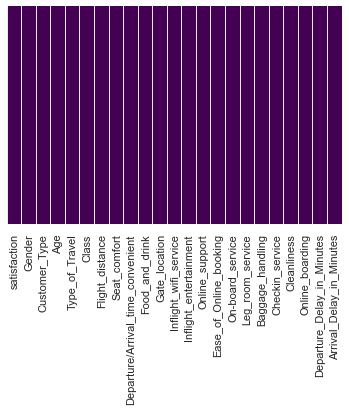

In [15]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## Exploratory Data Analysis

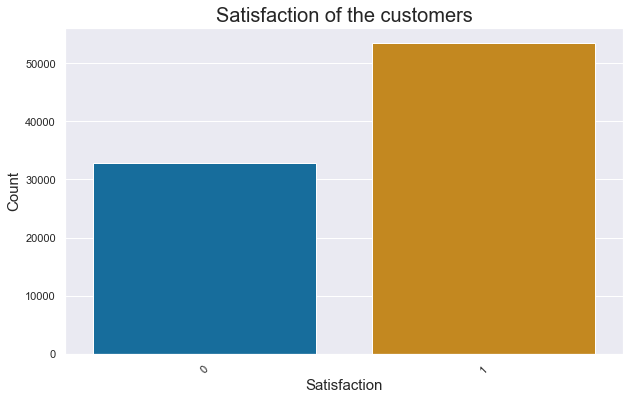

In [42]:
plt.figure(figsize=(10,6)) #to plot the rate of satisfaction

satisfaction = df.satisfaction.value_counts()[:20]

g = sns.countplot(x='satisfaction', 
                  data=df[df.satisfaction.isin(satisfaction.index.values)],
                 palette = 'colorblind')
g.set_title("Satisfaction of the customers", fontsize=20)
g.set_xlabel("Satisfaction", fontsize=15)
g.set_ylabel("Count", fontsize=15)
g.set_xticklabels(g.get_xticklabels(),rotation=45)

plt.show()

The given dataset shows more satisfied customers than dissatisfied customers

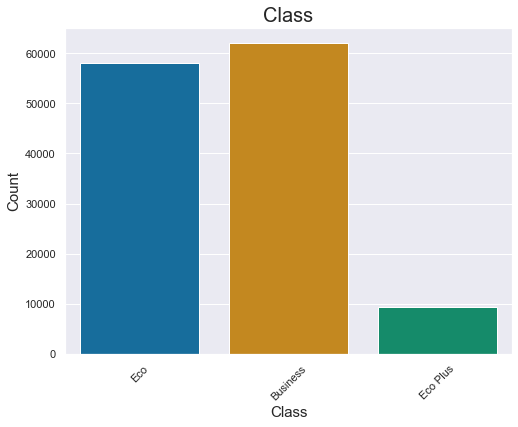

In [14]:
plt.figure(figsize=(8,6))

Class = df.Class.value_counts()[:20]

g = sns.countplot(x='Class', 
                  data=df[df.Class.isin(Class.index.values)],
                 palette = 'colorblind')
g.set_title("Class", fontsize=20)
g.set_xlabel("Class", fontsize=15)
g.set_ylabel("Count", fontsize=15)
g.set_xticklabels(g.get_xticklabels(),rotation=45)

plt.show()

Business class is most preferred by the customers, followed by the Eco class. The customers least prefer eco plus. The count of customers who travel in eco plus is less than 10,000.

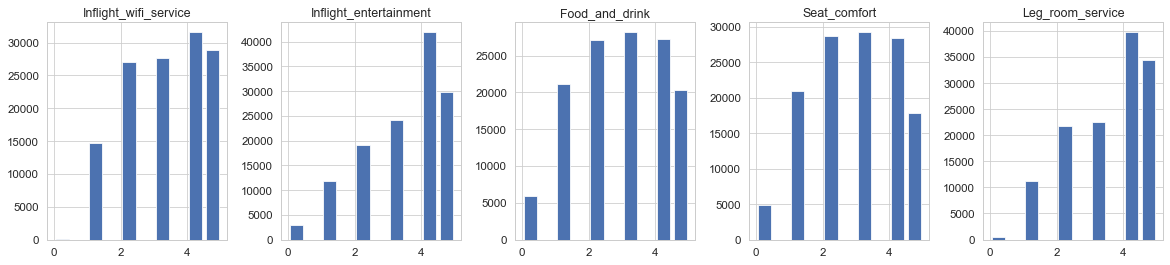

In [22]:
fig, ax = plt.subplots(figsize = (20, 4), ncols = 5)
ax1 = df.hist('Inflight_wifi_service', ax = ax[0], rwidth = 0.8)
ax2 = df.hist('Inflight_entertainment', ax = ax[1], rwidth = 0.8)
ax3 = df.hist('Food_and_drink', ax = ax[2], rwidth = 0.8)
ax4 = df.hist('Seat_comfort', ax = ax[3], rwidth = 0.8)
ax5 = df.hist('Leg_room_service', ax = ax[4], rwidth = 0.8)

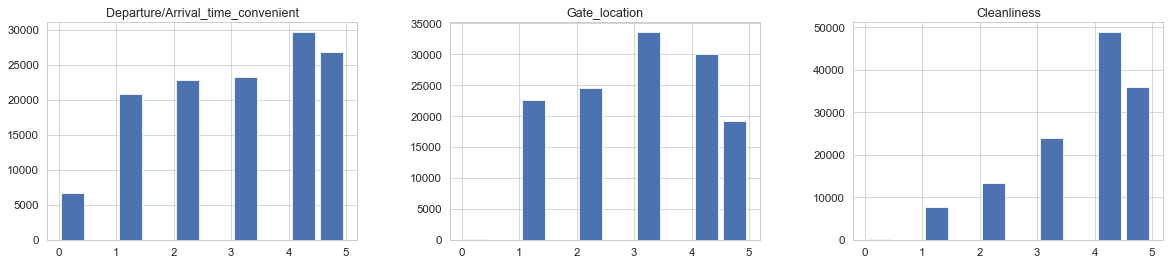

In [26]:
fig, ax = plt.subplots(figsize = (20, 4), ncols = 3)
ax1 = df.hist('Departure/Arrival_time_convenient', ax = ax[0], rwidth = 0.8)
ax2 = df.hist('Gate_location', ax = ax[1], rwidth = 0.8)
ax3 = df.hist('Cleanliness', ax = ax[2], rwidth = 0.8)

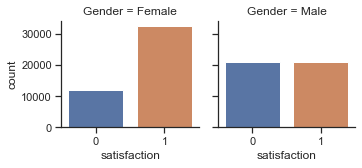

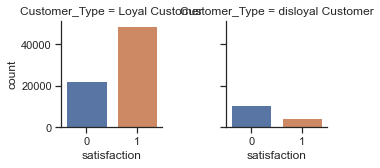

In [24]:
import seaborn as sns #dissatisfied=0, satisfied=1
with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Gender", col_wrap=2, data=df, kind="count", height=2.5, aspect=1.0)  
    g = sns.catplot("satisfaction", col="Customer_Type", col_wrap=2, data=df, kind="count", height=2.5, aspect=1.0)

In female customers, the majority of people who are satisfied are more whereas in male customers, the ratio is equal.
Most of the loyal customers are satisfied whereas majority of disloyal customers are dissatisfied.

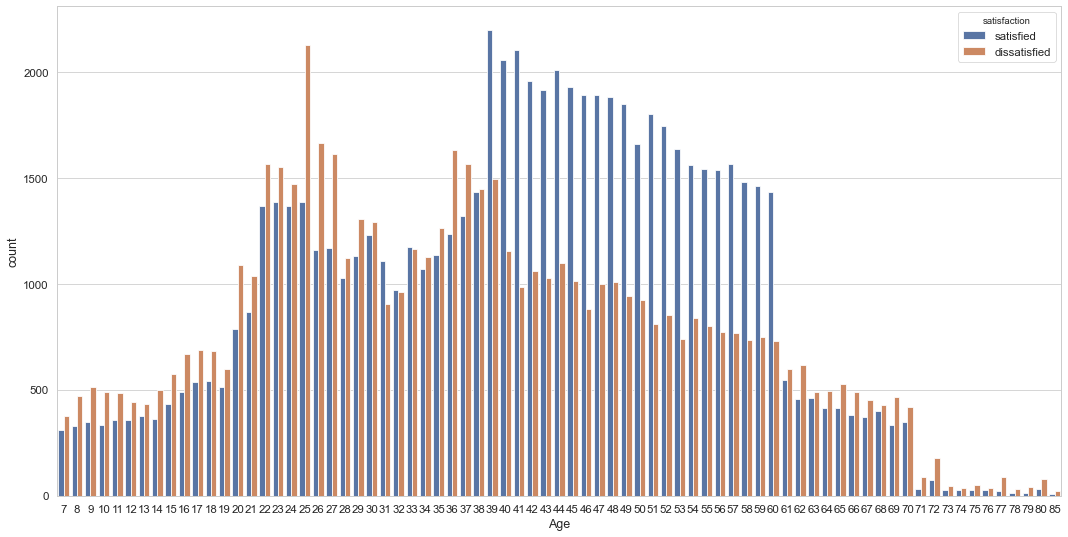

In [36]:
plt.figure(figsize=(18,9))
sns.countplot(x='Age',hue='satisfaction',data=df)

Customers travelling on flights are starting from 7 years till 85 years. Age group from 39-60 shows the most satisfaction rate and people from age group 7-37 are mostly dissatisfied with the services provided. 

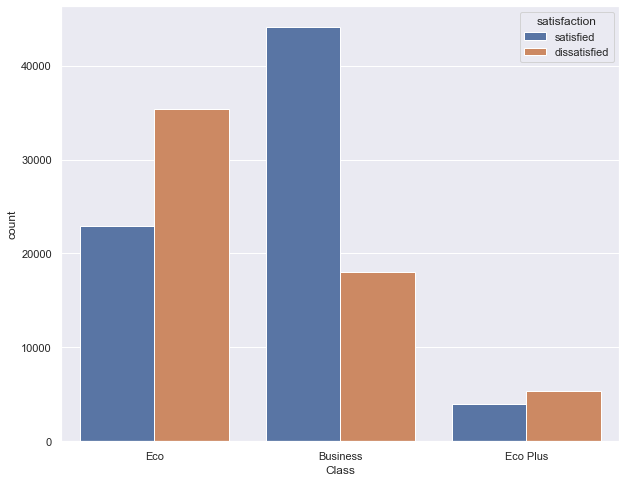

In [2]:
plt.figure(figsize=(10,8))
sns.countplot(x='Class',hue='satisfaction',data=df)

Majority of the customers who travel in Business class are satisfied, and the majority of the people who travelled in Eco are dissatisfied. There is only a little difference between the amount of satisfied and dissatisfied customers who travel in Eco plus.

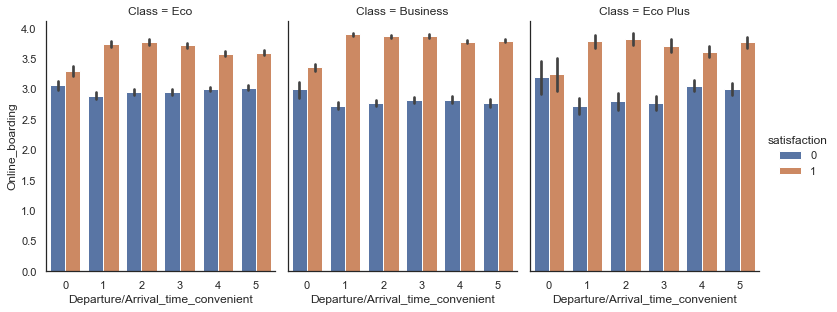

In [39]:
with sns.axes_style('white'):
    g = sns.catplot(x="Departure/Arrival_time_convenient", y="Online_boarding", hue="satisfaction", col="Class", data=df, kind="bar", height=4.5, aspect=.8)

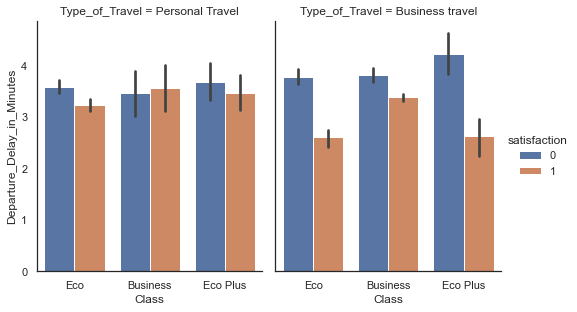

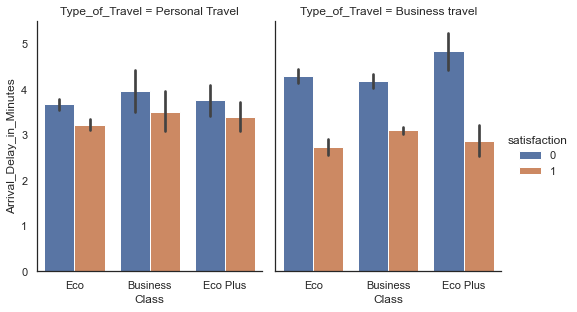

In [40]:
with sns.axes_style('white'):
    g = sns.catplot(x="Class", y="Departure_Delay_in_Minutes", hue="satisfaction", col="Type_of_Travel", data=df, kind="bar", height=4.5, aspect=.8)
    g = sns.catplot(x="Class", y="Arrival_Delay_in_Minutes", hue="satisfaction", col="Type_of_Travel", data=df, kind="bar", height=4.5, aspect=.8)


Irrespective of the travel class, majority of the customers are dissatisfied with the delay time in both departure and arrival case.

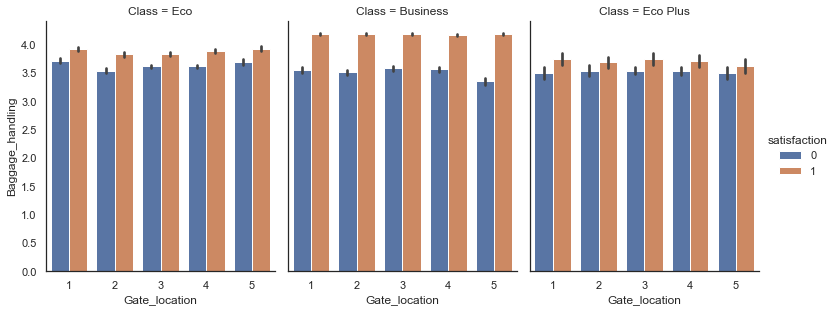

In [43]:
with sns.axes_style('white'):
    g = sns.catplot(x="Gate_location", y="Baggage_handling", hue="satisfaction", col="Class", data=df, kind="bar", height=4.5, aspect=.8)

The rate of satisfaction for every class is higher than the rate of dissatisfied customers.

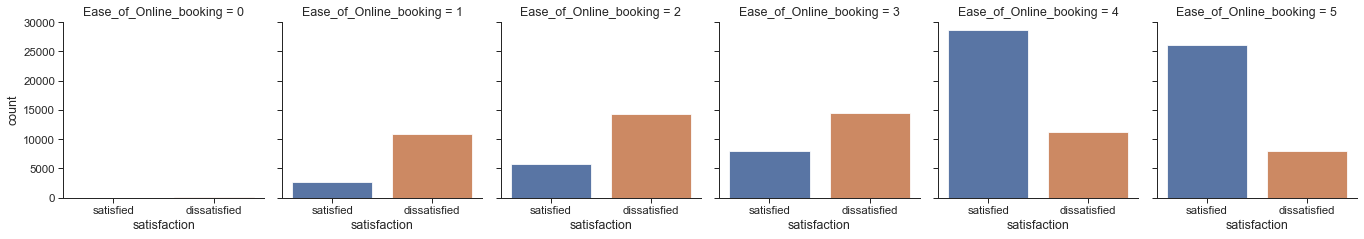

In [20]:
with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Ease_of_Online_booking", col_wrap=6, data=df, kind="count", height=3.5, aspect=.9)


A lot of satisfied customers find it easy to book tickets online while a few find it difficult to book tickets online, and these are mostly dissatisfied customers.

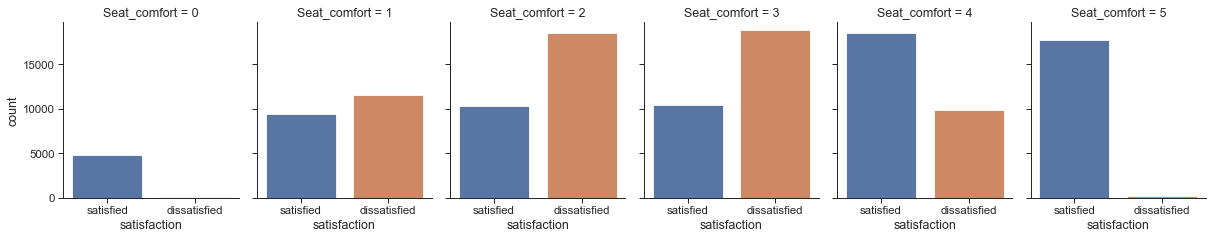

In [18]:
with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Seat_comfort", col_wrap=6, data=df, kind="count", height=3.5, aspect=.8)

Majority of dissatisfied customers rated seat comfort as 1,2 and 3. Satisfied customers dominated by rating 4 and 5. That means customers who are overall and generally satisfied with the airline services are also happy with the seating facilities.

,satisfaction,Age,Flight_distance,Seat_comfort,Departure/Arrival_time_convenient,Food_and_drink,Gate_location,Inflight_wifi_service,Inflight_entertainment,Online_support,Ease_of_Online_booking,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Cleanliness,Online_boarding,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
satisfaction,1.000000,0.134041,-0.052818,0.209518,-0.043939,0.133896,0.001780,0.194403,0.530921,0.385756,0.416858,0.298660,0.304786,0.218652,0.185302,0.209223,0.319267,-0.032774,-0.067377
Age,0.134041,1.000000,-0.234379,0.011633,0.032576,0.009563,0.005587,0.015292,0.145163,0.142553,0.114584,0.054186,0.114335,-0.003948,0.015439,-0.006638,0.056969,-0.006461,-0.007438
Flight_distance,-0.052818,-0.234379,1.000000,-0.040949,0.002807,-0.010994,-0.005882,0.008895,-0.035128,-0.033467,-0.043404,-0.020926,-0.039463,0.009755,0.008880,0.011121,0.003431,0.012199,0.000991
Seat_comfort,0.209518,0.011633,-0.040949,1.000000,0.483745,0.769728,0.471738,0.081892,0.399564,0.078623,0.146573,0.086323,0.095707,0.069457,0.013940,0.059454,0.084269,-0.013330,-0.018360
Departure/Arrival_time_convenient,-0.043939,0.032576,0.002807,0.483745,1.000000,0.524701,0.543138,-0.006322,0.061957,-0.014092,-0.013714,0.041915,0.013319,0.061542,0.045288,0.069971,-0.006554,-0.003920,-0.006165
Food_and_drink,0.133896,0.009563,-0.010994,0.769728,0.524701,1.000000,0.525550,0.017857,0.380634,0.031347,0.044571,0.034770,0.074584,0.034292,0.003833,0.032965,0.018808,-0.005298,-0.009823
Gate_location,0.001780,0.005587,-0.005882,0.471738,0.543138,0.525550,1.000000,-0.000118,0.006932,0.009740,0.011040,-0.011634,-0.001962,-0.003090,-0.026050,-0.000799,0.002821,0.002865,0.001833
Inflight_wifi_service,0.194403,0.015292,0.008895,0.081892,-0.006322,0.017857,-0.000118,1.000000,0.220069,0.532332,0.600377,0.045783,0.028343,0.027739,0.057318,0.025247,0.607990,-0.002679,-0.013348
Inflight_entertainment,0.530921,0.145163,-0.035128,0.399564,0.061957,0.380634,0.006932,0.220069,1.000000,0.418988,0.322212,0.155678,0.175855,0.105087,0.145622,0.094732,0.325702,-0.012489,-0.026381
Online_support,0.385756,0.142553,-0.033467,0.078623,-0.014092,0.031347,0.009740,0.532332,0.418988,1.000000,0.637725,0.134177,0.149122,0.091610,0.134015,0.081428,0.647262,-0.000150,-0.013317


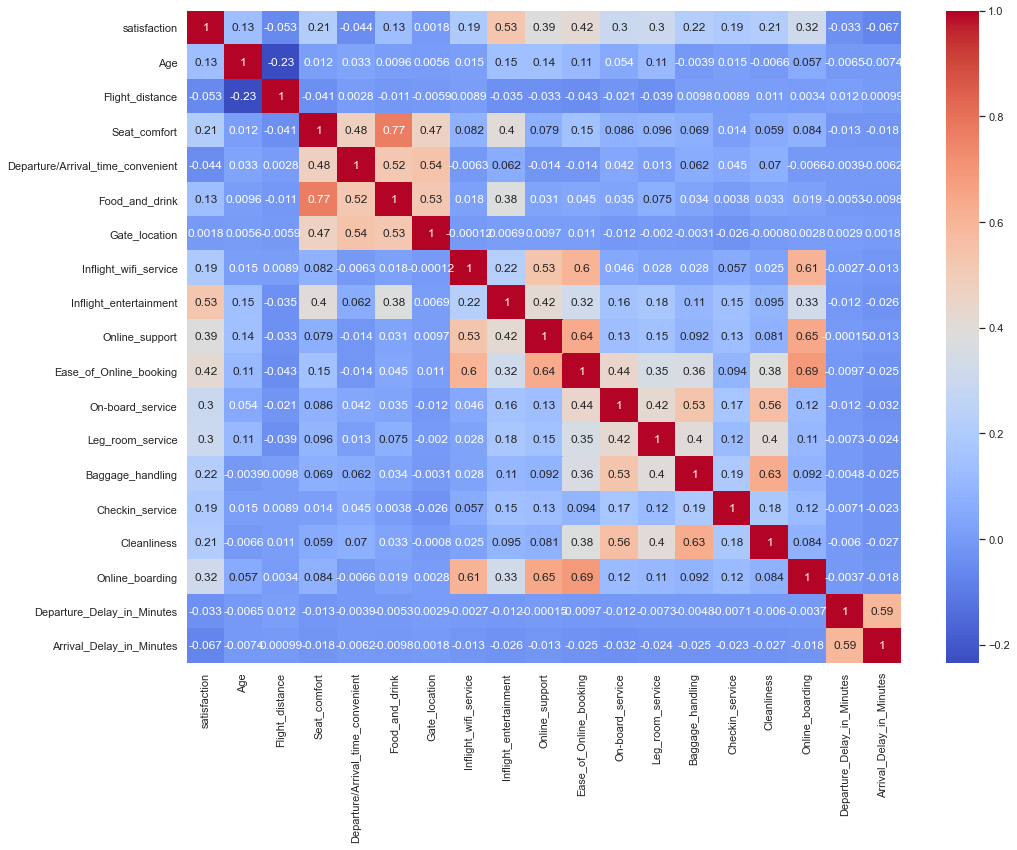

In [48]:
# Finding the relations between the variables.
plt.figure(figsize=(16,12))
c= df.corr()
sns.heatmap(c,cmap="coolwarm",annot=True) #BrBG, RdGy, coolwarm
c

Bright red indicates a strong and positive correlation, a little lighter shade of red is a positive correlation, whereas 0 shows no correlation and bright blue implies negative correlation.

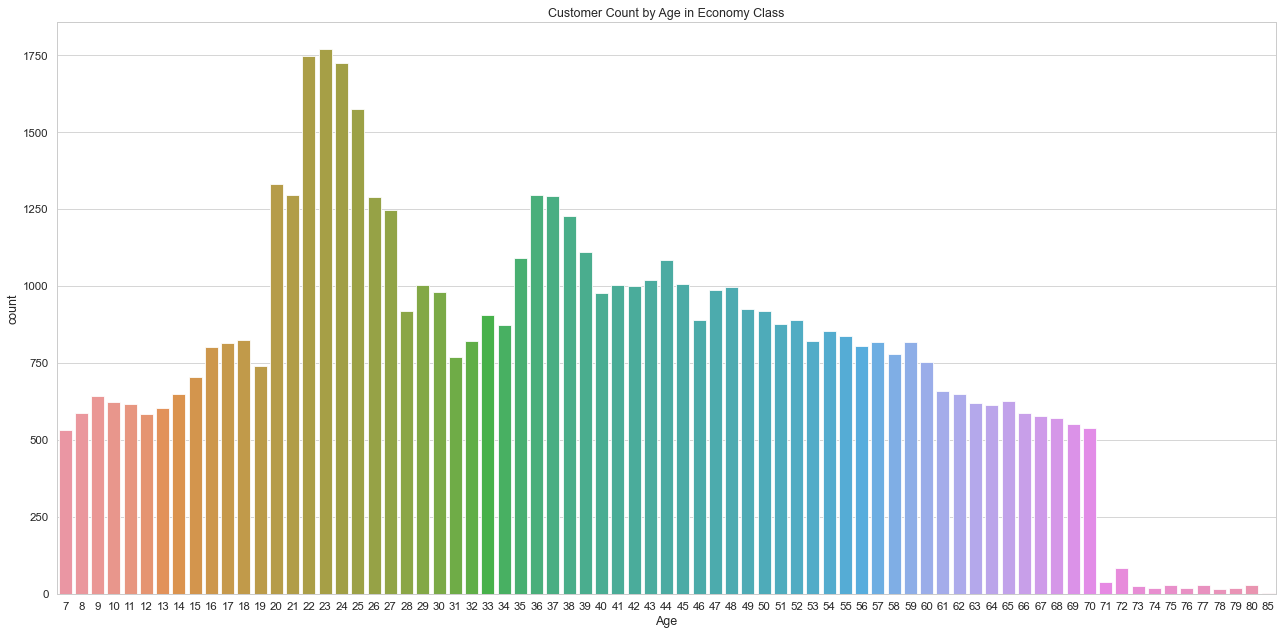

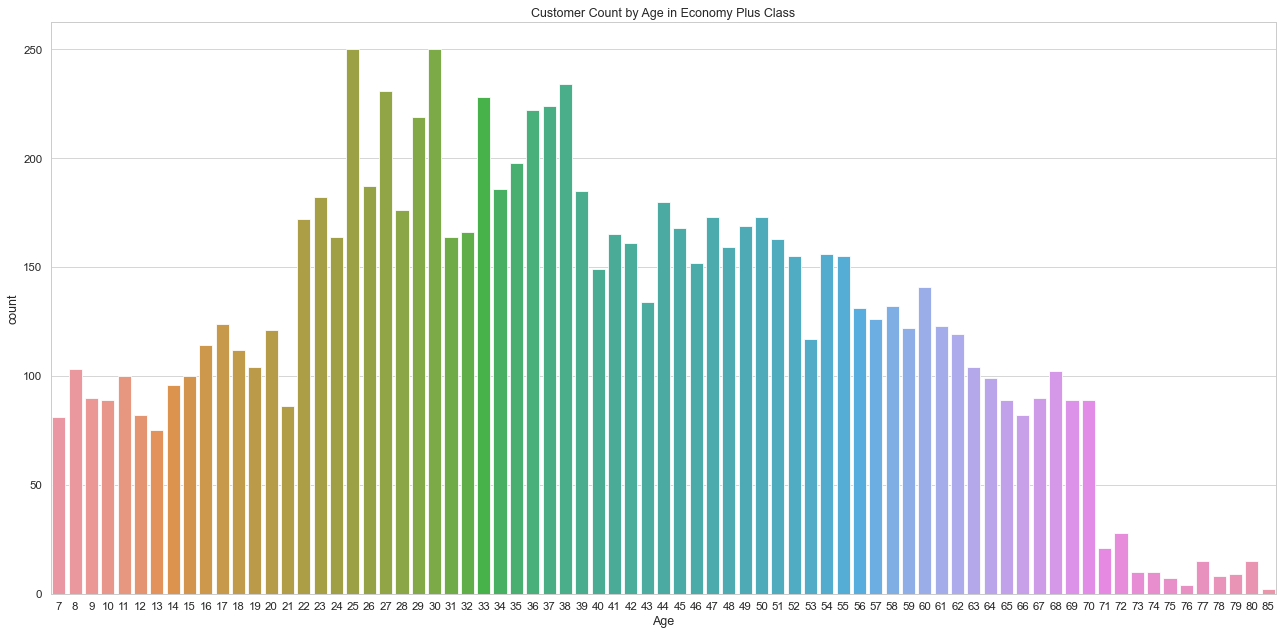

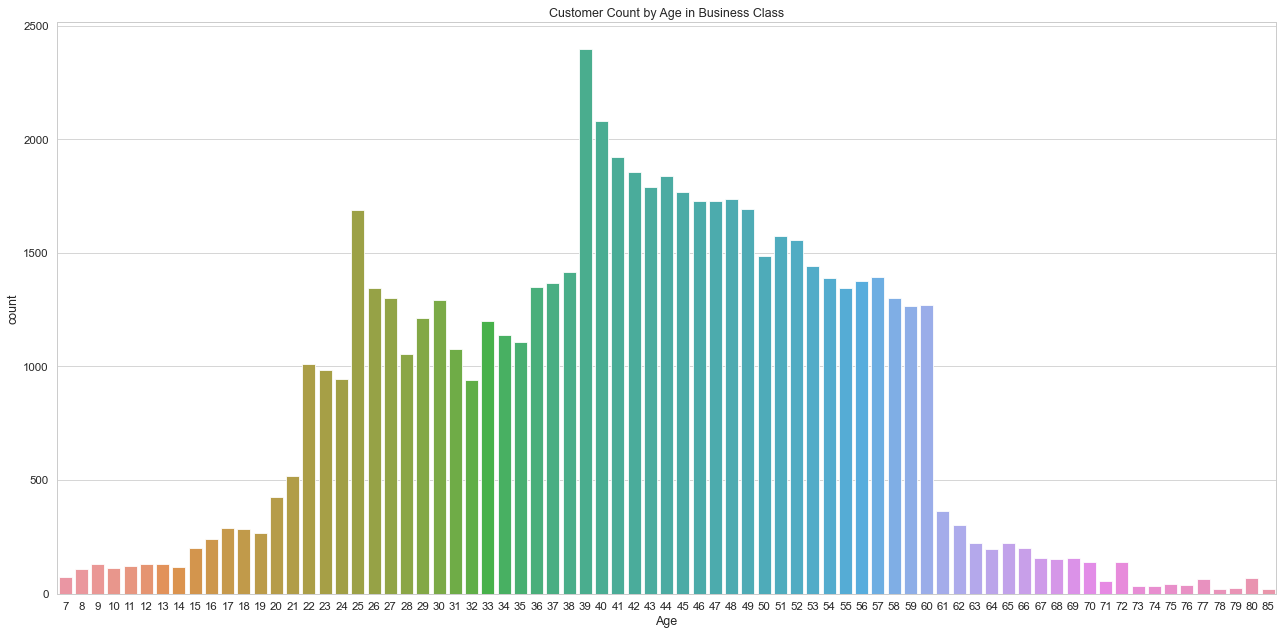

In [9]:
# Grouping count customer for each class
df_eco = df[df['Class']=='Eco']
df_eco1 = df[df['Class']=='Eco Plus']
df_bus = df[df['Class']=='Business']

# Showing distribution graph each class by age (customer)
## economy class
sns.set_style('whitegrid')
sns.set_context("paper", font_scale=1.3)
fig,ax = plt.subplots(1,1,figsize=(18,9))
sns.countplot(data=df_eco,x='Age')
ax.set_title('Customer Count by Age in Economy Class')
plt.tight_layout()
plt.show()

## economy plus class
sns.set_style('whitegrid')
sns.set_context("paper", font_scale=1.3)
fig,ax = plt.subplots(1,1,figsize=(18,9))
sns.countplot(data=df_eco1,x='Age')
ax.set_title('Customer Count by Age in Economy Plus Class')
plt.tight_layout()
plt.show()

## business class
sns.set_style('whitegrid')
sns.set_context("paper", font_scale=1.3)
fig,ax = plt.subplots(1,1,figsize=(18,9))
sns.countplot(data=df_bus,x='Age')
ax.set_title('Customer Count by Age in Business Class')
plt.tight_layout()
plt.show()

Economy class is being chosen the most by the age group 21-27.
Age group 23-39 is dominating the Economy plus class.
Age group 39-60 is choosing business class the most. 

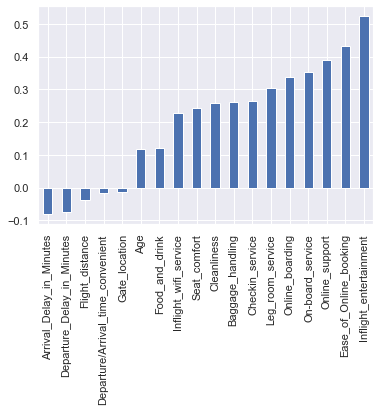

In [13]:
df.corr()['satisfaction'].sort_values().drop('satisfaction').plot(kind='bar')

In [35]:
GenderN = pd.get_dummies(df['Gender'],drop_first=True)
CustomerN = pd.get_dummies(df['Customer_Type'],drop_first=True)
TypeN = pd.get_dummies(df['Type_of_Travel'],drop_first=True)
ClassN = pd.get_dummies(df['Class'],drop_first=True)
df = pd.concat([df,GenderN,CustomerN,TypeN,ClassN],axis =1)
df.drop(['Gender','Customer_Type','Type_of_Travel','Class'],inplace =True,axis = 1)

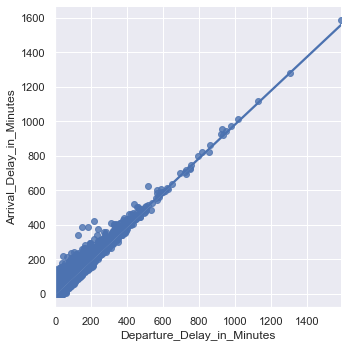

In [37]:
sns.lmplot(x='Departure_Delay_in_Minutes',y='Arrival_Delay_in_Minutes',data=df)

Departure_Delay_in_Minutes and Arrival_Delay_in_Minutes are found to have linear relationship.

## Data Modeling

In [12]:
features = ['Inflight_wifi_service','Online_boarding','Seat_comfort','Flight_distance',
            'Inflight_entertainment','On-board_service','Leg_room_service','Cleanliness','Checkin_service', 
             'Baggage_handling']
target = ['satisfaction']

# Split into test and train
X_train = df[features]
y_train = df[target].to_numpy()
X_test = df[features]
y_test = df[target].to_numpy()

# Normalize Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [13]:
import time
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, plot_confusion_matrix, plot_roc_curve
from matplotlib import pyplot as plt 
def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0=time.time()
    if verbose == False:
        model.fit(X_train,y_train.ravel(), verbose=0)
    else:
        model.fit(X_train,y_train.ravel())
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred) 
    time_taken = time.time()-t0
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test,y_pred,digits=5))
    plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.pink, normalize = 'all')
    plot_roc_curve(model, X_test, y_test)     
    
    return model, accuracy, roc_auc, time_taken

Accuracy = 0.8018943390101673
ROC Area under Curve = 0.7813257980198844
Time taken = 0.6439785957336426
              precision    recall  f1-score   support

           0    0.76355   0.69503   0.72768     32849
           1    0.82224   0.86762   0.84432     53408

    accuracy                        0.80189     86257
   macro avg    0.79290   0.78133   0.78600     86257
weighted avg    0.79989   0.80189   0.79990     86257



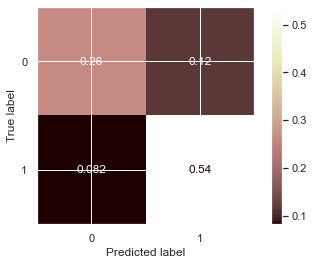

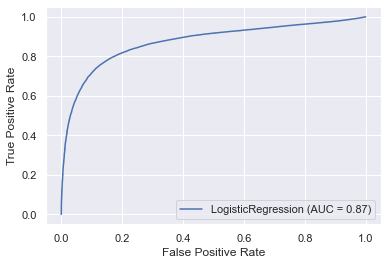

In [20]:
from sklearn.linear_model import LogisticRegression

params_lr = {'penalty': 'elasticnet', 'l1_ratio':0.5, 'solver': 'saga'}

model_lr = LogisticRegression(**params_lr)
model_lr, accuracy_lr, roc_auc_lr, tt_lr = run_model(model_lr, X_train, y_train, X_test, y_test)

Accuracy(percentage of correct predictions) of Logistic Regression is 80%.
Confusion matrix shows 54% true positives, 26% true negatives, 12% false postives and 8% false negatives.

Accuracy = 0.8040159059554587
ROC Area under Curve = 0.7896599997795712
Time taken = 0.08303356170654297
              precision    recall  f1-score   support

           0    0.74930   0.72943   0.73923     32849
           1    0.83625   0.84989   0.84302     53408

    accuracy                        0.80402     86257
   macro avg    0.79277   0.78966   0.79112     86257
weighted avg    0.80314   0.80402   0.80349     86257



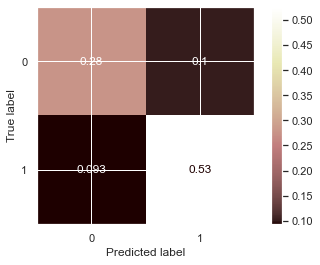

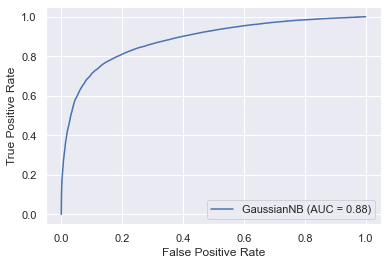

In [15]:
from sklearn.naive_bayes import GaussianNB

params_nb = {}

model_nb = GaussianNB(**params_nb)
model_nb, accuracy_nb, roc_auc_nb, tt_nb = run_model(model_nb, X_train, y_train, X_test, y_test)

In [ ]:
The accuracy of Naïve Bayes is also around 80%.
Confusion matrix shows 53% true positives, 28% true negatives, 10% false postives and 9% false negatives.

Accuracy = 0.9068365465991166
ROC Area under Curve = 0.8993620296466679
Time taken = 0.12005805969238281
              precision    recall  f1-score   support

           0    0.88514   0.86800   0.87649     32849
           1    0.91977   0.93072   0.92521     53408

    accuracy                        0.90684     86257
   macro avg    0.90245   0.89936   0.90085     86257
weighted avg    0.90658   0.90684   0.90666     86257



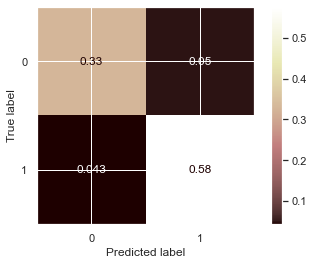

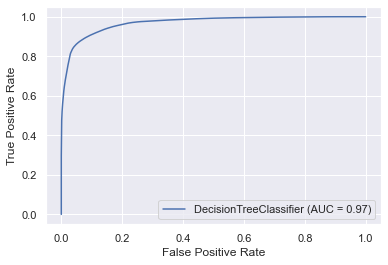

In [16]:
from sklearn.tree import DecisionTreeClassifier
params_dt = {'max_depth': 12,    
             'max_features': "sqrt"}

model_dt = DecisionTreeClassifier(**params_dt)
model_dt, accuracy_dt, roc_auc_dt, tt_dt = run_model(model_dt, X_train, y_train, X_test, y_test)

In [ ]:
Accuracy of the Decision tree classifier is around 90%.
Confusion matrix shows 58% true positives, 33% true negatives, 5% false postives and 4% false negatives.

Accuracy = 0.9571628969243076
ROC Area under Curve = 0.9548142436314752
Time taken = 8.422003030776978
              precision    recall  f1-score   support

           0    0.94269   0.94496   0.94383     32849
           1    0.96610   0.96467   0.96538     53408

    accuracy                        0.95716     86257
   macro avg    0.95440   0.95481   0.95460     86257
weighted avg    0.95718   0.95716   0.95717     86257



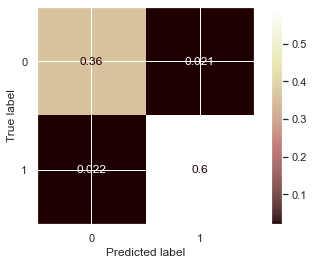

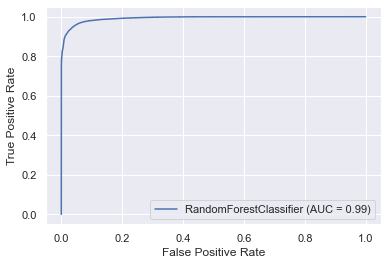

In [17]:
from sklearn.ensemble import RandomForestClassifier

params_rf = {'max_depth': 16,
             'min_samples_leaf': 1,
             'min_samples_split': 2,
             'n_estimators': 100,
             'random_state': 12345}

model_rf = RandomForestClassifier(**params_rf)
model_rf, accuracy_rf, roc_auc_rf, tt_rf = run_model(model_rf, X_train, y_train, X_test, y_test)

In [ ]:
The accuracy of Random forest is 95% and is highest compared to all other models.
